[Lien Youtube du DCGAN du notebook](https://www.youtube.com/watch?v=IZtv9s_Wx9I)

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Model Architecture

### Discriminator

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, channels_img, features_d):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            # input: N x channels_img x 28 x 28
            self._block(channels_img, features_d, 4,2,1),
            self._block(features_d, features_d * 2, 4, 2, 1),
            self._block(features_d * 2, features_d * 4, 4, 2, 1),
            self._block(features_d * 4, features_d * 8, 4, 2, 1),
            # After all _block img output is 4x4 (Conv2d below makes into 1x1)
            nn.Conv2d(features_d * 8, 1, kernel_size=1, stride=2, padding=0),
            nn.Sigmoid(),
        )

    def _block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False ),
            nn.ReLU(0.2),
        )

    def forward(self, x):
        return self.disc(x)


#### Generator

In [ ]:
class Generator(nn.Module):
  def __init__(self, z_dim, channels_img, features_g):
    super(Generator, self).__init__()
    self.gen = nn.Sequential(
      self._block(z_dim, features_g*8, 4, 1, 0), 
      self._block(features_g*8, features_g*4, 4, 2, 1), 
      self._block(features_g*4, features_g*2, 4, 2, 1),
      nn.ConvTranspose2d(features_g*2,channels_img, kernel_size = 4, stride = 2, padding = 3), #1*1
      nn.Tanh(), # [-1,1]
    )

  def _block(self, in_channels, out_channels, kernel_size, stride, padding):
    return nn.Sequential(
      nn.ConvTranspose2d( in_channels, out_channels, kernel_size, stride, padding, bias=False),
      nn.BatchNorm2d(out_channels), 
      nn.ReLU(),
  ) 
  
  def forward(self,x):
    return self.gen(x)

Test

# Training Setup

In [ ]:
import torch.optim as optim 
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

## Hyperparameters

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

lr = 2e-4 #learning rate
batch_size = 128 #nombre de batch 
img_size = 28 #taille de l'image qu'on va plot
channels_img = 1 # pour noir et blanc
z_dim = 100 #noise
num_epochs = 10 #iteration

features_disc = 64
features_gen = 64

cuda


In [ ]:
transform = transforms.Compose(
    [
     transforms.Resize(img_size),
     transforms.ToTensor(),
     transforms.Normalize(
         [0.5 for _ in range(channels_img)], [0.5 for _ in range(channels_img)])
    ]
)

dataset = datasets.MNIST(root="dataset/", train=True, transform = transform, download=True)
loader = DataLoader(dataset, batch_size = batch_size, shuffle=True)
print(len(loader))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw

469


Initialisation

In [ ]:
gen = Generator(z_dim, channels_img, features_gen).to(device)
disc = Discriminator(channels_img, features_disc).to(device)

opt_gen = optim.Adam(gen.parameters(), lr = lr, betas =(0.5, 0.999))
opt_disc = optim.Adam(disc.parameters(), lr = lr, betas =(0.5, 0.999))

criterion = nn.BCELoss() #fonction loss

fixed_noise = torch.randn(32, z_dim, 1, 1).to(device)

writer_real = SummaryWriter(f"logs/real")
writer_fake = SummaryWriter(f"logs/fake")

In [ ]:
  # Cellule verification shape(truc)
  
  noise = torch.randn((1, z_dim, 1,1)).to(device)
  truc = gen(noise)
  truc.shape

torch.Size([1, 1, 28, 28])

#### Training

Epoch: 1 Loss D.: 0.5898678302764893
Epoch: 1 Loss G.: 0.9983396530151367


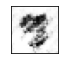

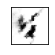

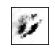

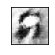

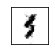

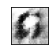

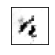

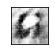

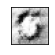

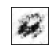

Epoch: 2 Loss D.: 0.6067240238189697
Epoch: 2 Loss G.: 0.937873363494873


<Figure size 432x288 with 0 Axes>

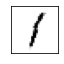

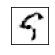

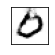

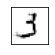

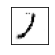

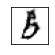

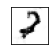

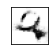

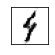

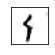

Epoch: 3 Loss D.: 0.6360417604446411
Epoch: 3 Loss G.: 0.8179551362991333


<Figure size 432x288 with 0 Axes>

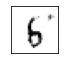

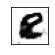

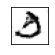

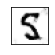

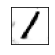

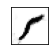

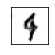

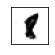

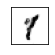

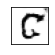

Epoch: 4 Loss D.: 0.6086260080337524
Epoch: 4 Loss G.: 1.507635235786438


<Figure size 432x288 with 0 Axes>

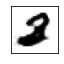

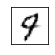

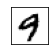

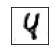

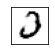

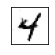

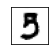

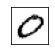

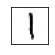

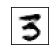

Epoch: 5 Loss D.: 0.5623115301132202
Epoch: 5 Loss G.: 1.2273187637329102


<Figure size 432x288 with 0 Axes>

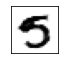

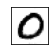

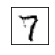

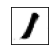

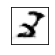

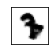

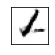

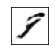

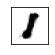

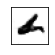

Epoch: 6 Loss D.: 0.5524054765701294
Epoch: 6 Loss G.: 1.1930339336395264


<Figure size 432x288 with 0 Axes>

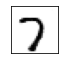

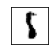

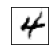

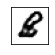

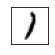

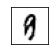

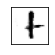

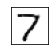

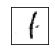

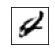

Epoch: 7 Loss D.: 0.5157698392868042
Epoch: 7 Loss G.: 1.2793538570404053


<Figure size 432x288 with 0 Axes>

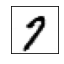

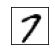

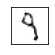

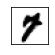

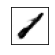

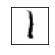

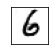

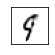

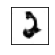

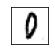

Epoch: 8 Loss D.: 0.5607418417930603
Epoch: 8 Loss G.: 1.4923206567764282


<Figure size 432x288 with 0 Axes>

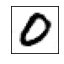

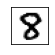

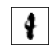

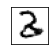

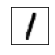

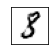

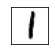

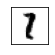

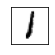

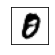

Epoch: 9 Loss D.: 0.5380711555480957
Epoch: 9 Loss G.: 0.9380887746810913


<Figure size 432x288 with 0 Axes>

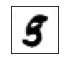

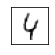

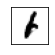

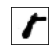

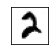

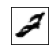

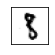

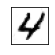

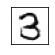

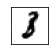

Epoch: 10 Loss D.: 0.49100953340530396
Epoch: 10 Loss G.: 1.2480151653289795


<Figure size 432x288 with 0 Axes>

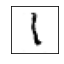

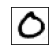

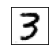

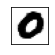

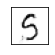

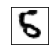

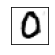

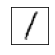

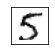

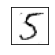

<Figure size 432x288 with 0 Axes>

In [ ]:
step =0

for epoch in range(num_epochs):
  for batch_idx, (real,_) in enumerate(loader):
    real = real.to(device)
    noise = torch.randn((batch_size, z_dim, 1,1)).to(device)
    fake = gen(noise)

    ### Train Discriminator max log(D(x)) + log(1 - D(G(z)))
    disc_real = disc(real).reshape(-1)
    loss_disc_real = criterion(disc_real, torch.ones_like(disc_real))
    disc_fake = disc(fake).reshape(-1)
    loss_disc_fake = criterion(disc_fake, torch.zeros_like(disc_fake))

    loss_disc = (loss_disc_real + loss_disc_fake)/2
    disc.zero_grad()
    loss_disc.backward(retain_graph =True)
    opt_disc.step()

    ### Train Generator max  log(D(G(z)))
    output = disc(fake)
    # print("output.shape =", output.shape) #il faut 128,1,1,1
    loss_gen = criterion(output, torch.ones_like(output))
    gen.zero_grad()
    loss_gen.backward(retain_graph =True)
    opt_gen.step()


  if batch_idx == len(loader) - 1:
      print(f"Epoch: {epoch+1} Loss D.: {loss_disc}")
      print(f"Epoch: {epoch+1} Loss G.: {loss_gen}")
      fig = plt.figure(figsize=(20,5))
      for i in range(10):
        #print des résultats à la fin d'un epoch
        ax = plt.subplot(5, 2, i+1)
        plt.imshow(fake[i].detach().cpu().reshape(28, 28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
        plt.show()
      plt.tight_layout()
        
      
      with torch.no_grad():
          fake = gen(fixed_noise)
          data = real
          img_grid_fake = torchvision.utils.make_grid(fake, normalize=True)
          img_grid_real = torchvision.utils.make_grid(data, normalize=True)
          
          writer_fake.add_image(
              "Mnist Fake Image", img_grid_fake, global_step =step 
          )
          
          writer_real.add_image(
              "Mnist Real Image", img_grid_real, global_step =step 
          )
  
          step += 1

In [ ]:
latent_space_samples = torch.randn(batch_size, z_dim,1,1).to(device=device)

generated_samples = gen(latent_space_samples)
generated_samples = generated_samples.cpu().detach()

print((len(generated_samples)//16 -1)*16)
# print(len(generated_samples)//16)
# plt.imshow(generated_samples[(len(generated_samples)//16 -1)*16].reshape(28,28))

112


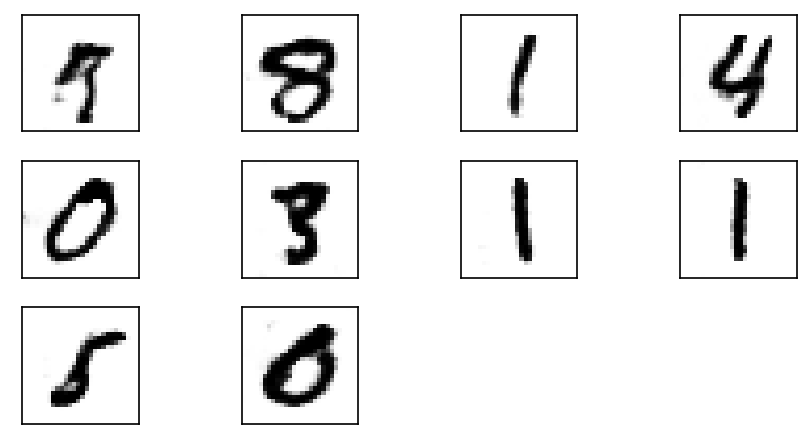

In [ ]:
plt.figure(dpi=150)
for i in range(10):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(generated_samples[i+(len(generated_samples)//16 -1)*16].reshape(28, 28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()